In [3]:
from tqdm import tqdm
path = r'C:\Users\Qiu-Weidong\Documents\imageset-editor\tmp\imageset-speciosa\src\8_speciosa'

def get_image_list(path: str) -> list[str]:
  import os
  '''
    从 imageset-xxx/src/8_katana 目录下获取所有的图片文件名称
    return ['imageset-xxx/src/8_katana/katana_000001.jpg', ...]
  '''
  image_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp'}
  imagefilenames = [os.path.join(path, imagefilename) for imagefilename in os.listdir(path)
    if os.path.isfile(os.path.join(path, imagefilename)) and os.path.splitext(imagefilename)[1].lower() in image_extensions]
  imagefilenames = [os.path.normpath(imagefilename).replace('\\', '/') for imagefilename in imagefilenames]
  return imagefilenames

imagefiles = get_image_list(path)
image_pair = []

for i in range(len(imagefiles)):
  for j in range(i+1, len(imagefiles)):
    image_pair.append((imagefiles[i], imagefiles[j]))
image_pair


import os,imagehash
from PIL import Image


m = {}

# 应该先将每张图片的 hash 值求出来
for filename in tqdm(imagefiles):
  highfreq_factor = 4 # resize的尺度
  hash_size = 32 # 最终返回hash数值长度
  image_scale = 64
  img_size = hash_size * highfreq_factor
  image = Image.open(filename)
  phash = imagehash.phash(image, hash_size=hash_size,highfreq_factor=highfreq_factor)
  ahash = imagehash.average_hash(image,hash_size=hash_size)   
  dhash = imagehash.dhash(image,hash_size=hash_size) 
  whash = imagehash.whash(image,image_scale=image_scale,hash_size=hash_size,mode = 'db4')
  m[filename] = {
    "phash": phash, "ahash": ahash, "dhash": dhash, "whash": whash 
  }



100%|██████████| 85/85 [00:02<00:00, 36.18it/s]


In [15]:
from IPython.display import Image

def show_result(filename1: str, filename2: str, value):
  display('-------------------------------------------------------------------------------')
  size_i = os.path.getsize(filename1)
  size_j = os.path.getsize(filename2)
  display(os.path.basename(filename1),str(size_i/1024)+'KB')
  display(os.path.basename(filename2),str(size_j/1024)+'KB')
  display(Image(filename=filename1, width=200), Image(filename=filename2, width=200) )
  display(value)

In [19]:
class DSU:
  def __init__(self, filenames: list[str]):
    self.root = { key: key for key in filenames }
      
  def find(self, k: str):
    if self.root[k] == k:
      return k
    return self.find(self.root[k])
  
  def union(self, a, b):
    x = self.find(a)
    y = self.find(b)
    if x != y:
      self.root[y] = x
    return

100%|██████████| 3570/3570 [00:00<00:00, 97826.17it/s]

-----------------------------------------------------------------------------


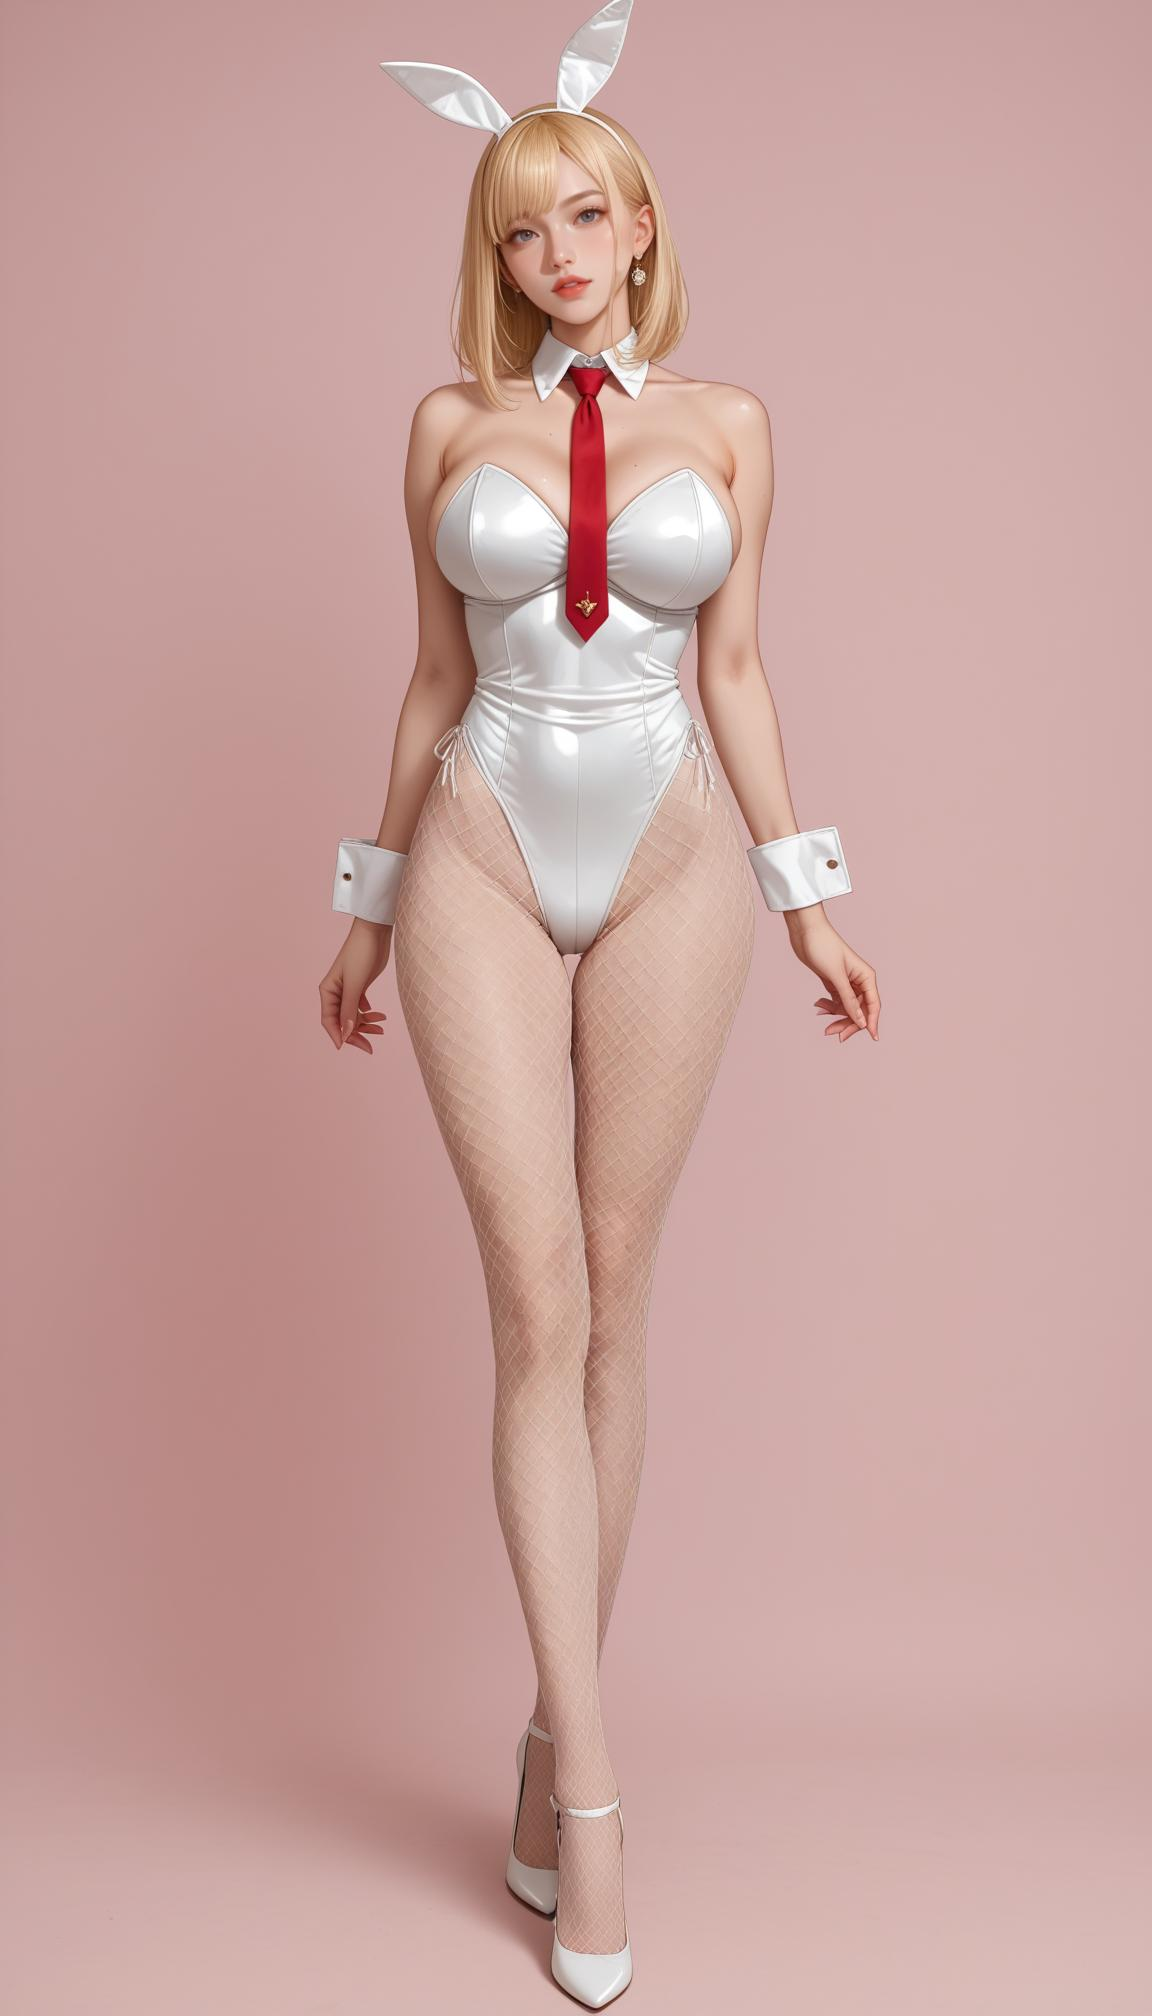

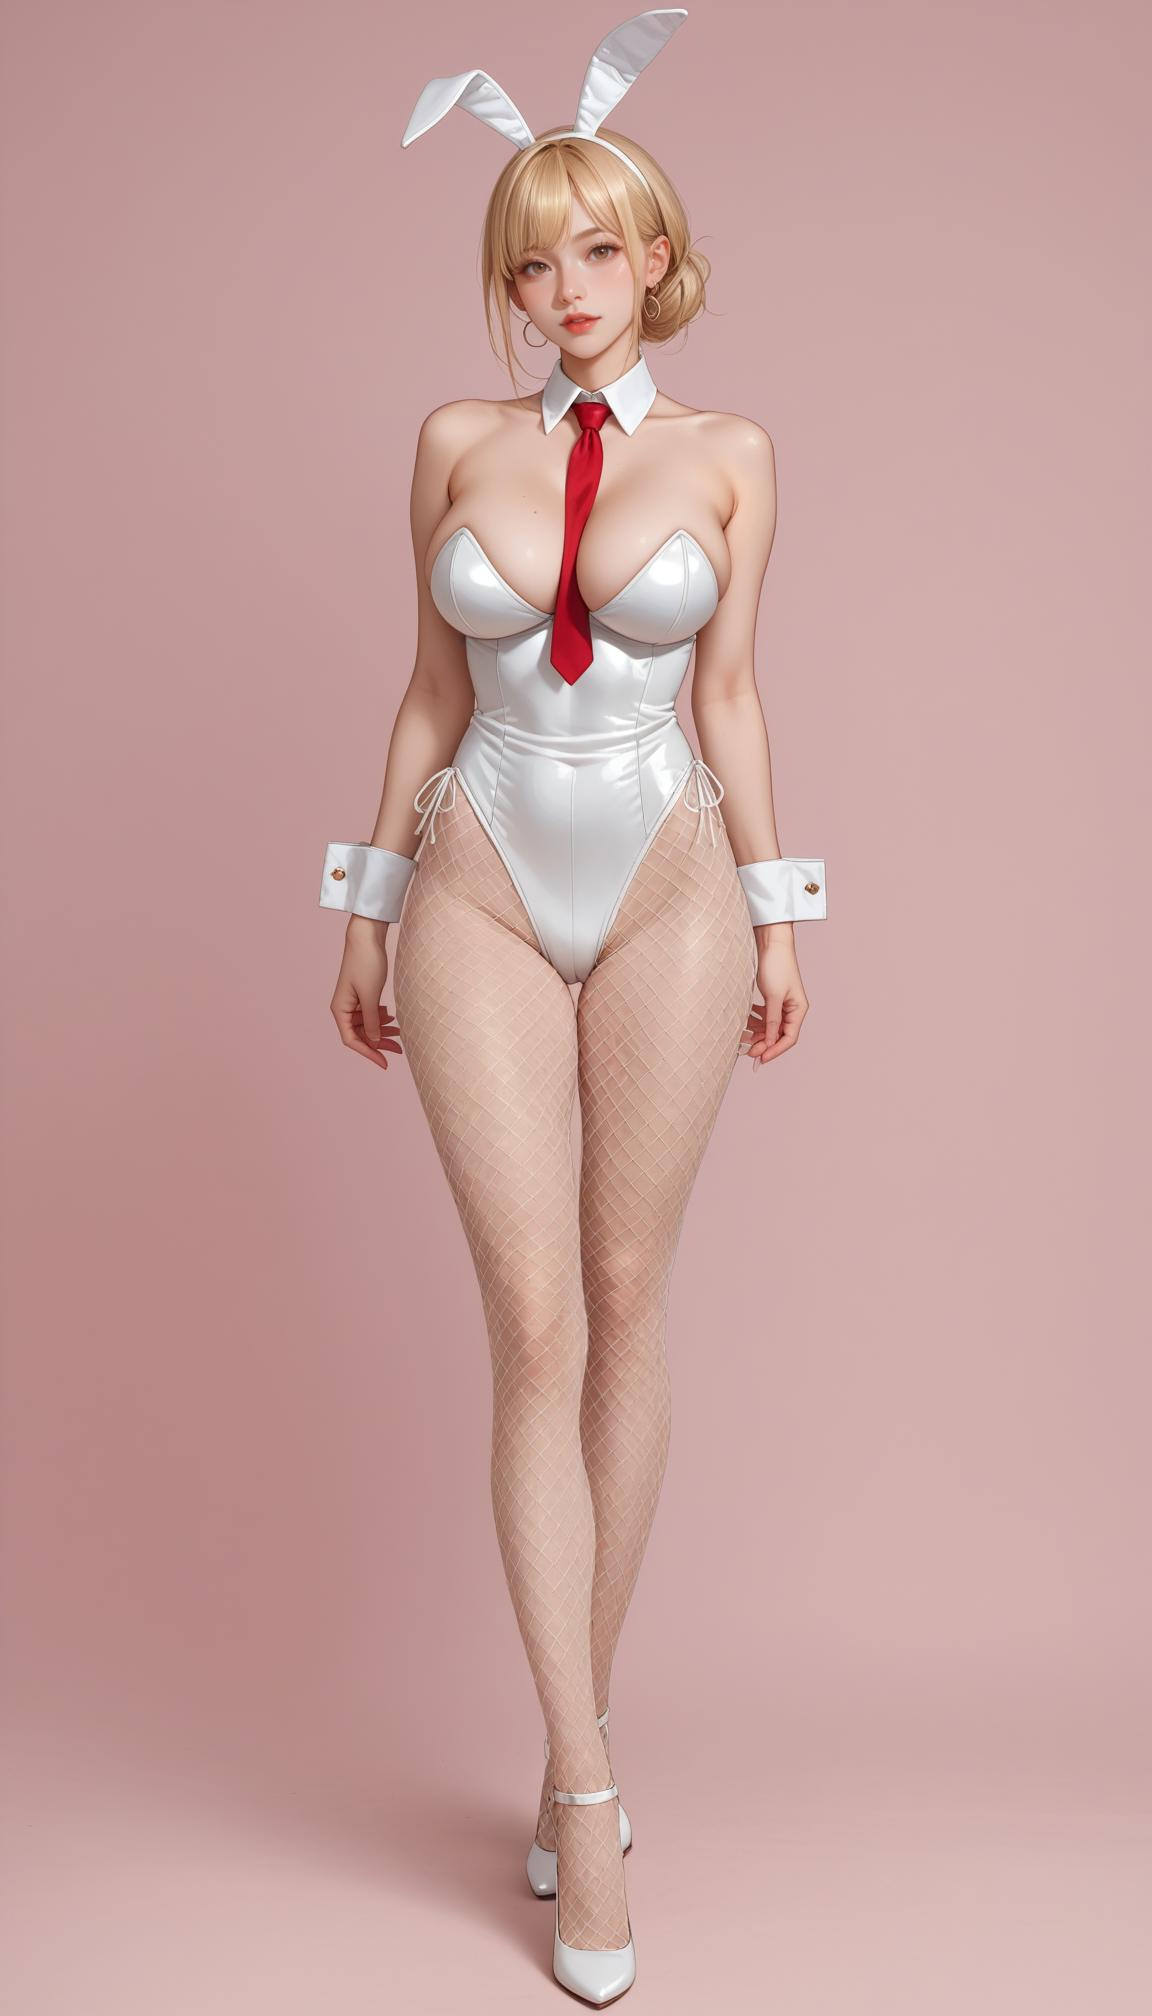

In [4]:
from IPython.display import Image
result = {}

for filename in imagefiles:
  result[filename] = [filename, ]

for filename1, filename2 in tqdm(image_pair):
  d1 = m[filename1]
  d2 = m[filename2]
  
  phash1 = d1['phash']
  phash2 = d2['phash']
  phash_value = 1-(phash1-phash2)/len(phash1.hash)**2
  
  ahash1 = d1['ahash']
  ahash2 = d2['ahash']  
  ahash_value = 1-(ahash1-ahash2)/len(ahash1.hash)**2
  
  dhash1 = d1['dhash']
  dhash2 = d2['dhash']
  dhash_value = 1-(dhash1-dhash2)/len(dhash1.hash)**2  

  whash1 = d1['whash']
  whash2 = d2['whash']
  whash_value = 1-(whash1-whash2)/len(whash1.hash)**2  

  value_hash = max(phash_value,ahash_value,dhash_value,whash_value)
  if(value_hash > 0.9):#阈值设为0.9
    result[filename1].append(filename2)

for filenames in result.values():
  if len(filenames) <= 1:
    continue
  print('-----------------------------------------------------------------------------')
  for filename in filenames:
    display(Image(filename=filename, width=200) )



